# Library Imports

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Data Imports

In [2]:
images = np.load("./images.npy")
images = np.reshape(images, (len(images), 28 * 28))

labels = np.load("./labels.npy")

## Setting the Random Environment

In [3]:
seed = 42
np.random.seed(seed)

In [4]:
print(images.shape)
print(labels.shape)

(6500, 784)
(6500,)


In [5]:
labels = tf.keras.utils.to_categorical(labels)

In [6]:
labels.shape

(6500, 10)

## Model Spplitting (Train, Validation, Test)

## training = 60%, validation = 15%, testing = 25%

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.40, random_state=seed, stratify=labels
)
x_test, x_validation, y_test, y_validation = train_test_split(
    x_test, y_test, test_size=0.375, random_state=seed, stratify=y_test
)
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(3900, 784)
(975, 784)
(1625, 784)


## Model Selection
### Since we have found the best model we have commented out the creation of the model
### and loading the best model below

In [8]:
# model = Sequential()  # declare model
# model.add(
#     Dense(
#         784,
#         input_shape=(28 * 28,),
#         kernel_initializer="random_uniform",
#         activation="relu",
#     )
# )  # first layer

## Our Model

In [9]:
# model.add(Dense(392, kernel_initializer="random_uniform", activation="relu"))  # First Hidden Layer
#
# model.add(Dense(196, kernel_initializer="random_uniform", activation="relu"))  # Second Hidden Layer
#
# model.add(Dense(98, kernel_initializer="glorot_uniform", activation="tanh"))  # Third Hidden Layer

## Softmax is often used as the activation for the last layer of a classification network
## because the result could be interpreted as a probability distribution.

In [10]:
# model.add(Dense(10, kernel_initializer="he_normal", activation="softmax"))  # last layer

## Compile Model

In [11]:
# model.compile(optimizer='sgd',
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

## Loading the best model

In [12]:
model = load_model("best_trained_model.h5")

2021-10-12 14:13:53.804911: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train Model

In [13]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_validation, y_validation),
    epochs=100,
    batch_size=128,
)

2021-10-12 14:13:54.125172: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
31/31 [==============================] - 1s 11ms/step - loss: 0.0095 - accuracy: 0.9990 - val_loss: 0.5430 - val_accuracy: 0.8523
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.9990 - val_loss: 0.5444 - val_accuracy: 0.8523
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0093 - accuracy: 0.9990 - val_loss: 0.5432 - val_accuracy: 0.8544
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 0.9990 - val_loss: 0.5460 - val_accuracy: 0.8544
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.9992 - val_loss: 0.5453 - val_accuracy: 0.8523
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.5474 - val_accuracy: 0.8513
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0087 - accuracy: 0.9992 - val_loss: 0.5503 - val_accuracy: 0.8533
Epoch 8/100


## Accuracy and Loss

In [14]:
print(history.history)

plt.plot(
    range(len(history.history.get("accuracy"))),
    history.history.get("accuracy"),
    label="accuracy",
)
plt.plot(
    range(len(history.history.get("val_accuracy"))),
    history.history.get("val_accuracy"),
    label="validation accuracy",
)
ax = plt.gca()
ax.set_ylim([0.75, 1.05])
plt.legend(loc="lower right")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.savefig("accuracy.png")

plt.clf()

plt.plot(
    range(len(history.history.get("loss"))), history.history.get("loss"), label="loss"
)
plt.plot(
    range(len(history.history.get("val_loss"))),
    history.history.get("val_loss"),
    label="validation_loss",
)
plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("loss.png")

plt.clf()

{'loss': [0.009519936516880989, 0.009385121054947376, 0.009284080006182194, 0.009128669276833534, 0.008950727060437202, 0.008836228400468826, 0.008702065795660019, 0.008575364015996456, 0.008469504304230213, 0.008388368412852287, 0.008291793055832386, 0.008201735094189644, 0.008120211772620678, 0.007974372245371342, 0.007867066189646721, 0.007788166403770447, 0.007701589725911617, 0.007629671599715948, 0.007554951123893261, 0.007468424737453461, 0.0073976414278149605, 0.007343117147684097, 0.007266223430633545, 0.007199728395789862, 0.007134654093533754, 0.007069821003824472, 0.007014020811766386, 0.006948492489755154, 0.006890058051794767, 0.006824542302638292, 0.00677404273301363, 0.006706492509692907, 0.006655000615864992, 0.006603152956813574, 0.006538982968777418, 0.006493291351944208, 0.006439188029617071, 0.006399182602763176, 0.00634759059175849, 0.00629416573792696, 0.006245304364711046, 0.006100915838032961, 0.006028581410646439, 0.0059686447493731976, 0.0059175146743655205, 

<Figure size 432x288 with 0 Axes>

## Model Prediction

In [15]:
prediction = model.predict(x_test)

## Model Evaluation

In [16]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("\n")
print(scores)
accuracy = scores[1] * 100
error = 100 - scores[1] * 100
print("Accuracy: %.2f%%" % accuracy)
print("Error: %.2f%%" % error)



[0.6565943360328674, 0.8541538715362549]
Accuracy: 85.42%
Error: 14.58%


In [17]:
projection, actual = [], []

# Iterate through predictions, determining which value recieved the highest prediction and
#   marking that value in a list (denoting our prediction)
for p in prediction:

    # Reset max value, index, and max index each iteration
    maximum = float(0)
    index, max_index = 0, -1

    # Iterate through each set of preductions determining the highest predicted value
    for n in p:
        if float(n) > maximum:
            maximum = float(n)
            max_index = index
        index += 1

    # Mark our projection for this set in our list
    projection.append(max_index)

# Convert test set (actuals) back to standard numerical format
for t in y_test:
    actual.append(np.argmax(t))


# Generate Confusion Matrix
y_actual = pd.Series(actual, name="Actual")
y_predict = pd.Series(projection, name="Predicted")
confusion_matrix = pd.crosstab(y_actual, y_predict)

# Generate normalized confusion matrix
norm_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)

# Generate full confusion matrix with totals
full_confusion_matrix = pd.crosstab(
    y_actual,
    y_predict,
    rownames=["True Label"],
    colnames=["Predicted Label"],
    margins=True,
)

Text(33.0, 0.5, 'Actual')

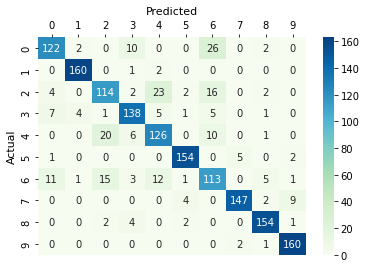

In [19]:
# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_actual, y_predict)
x = sns.heatmap(cf_matrix, vmin=0, vmax=163, annot=True,fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', loc="center", size=11)

## Misclassified Images

Number of Misclassified Images: 237

Actual, Predicted: Frequency 
{'0, 6': 26, '2, 4': 23, '4, 2': 20, '2, 6': 16, '6, 2': 15, '6, 4': 12, '6, 0': 11, '4, 6': 10, '7, 9': 9, '3, 0': 7, '4, 3': 6, '5, 7': 5, '7, 5': 4, '6, 3': 3, '7, 8': 2, '3, 5': 1}


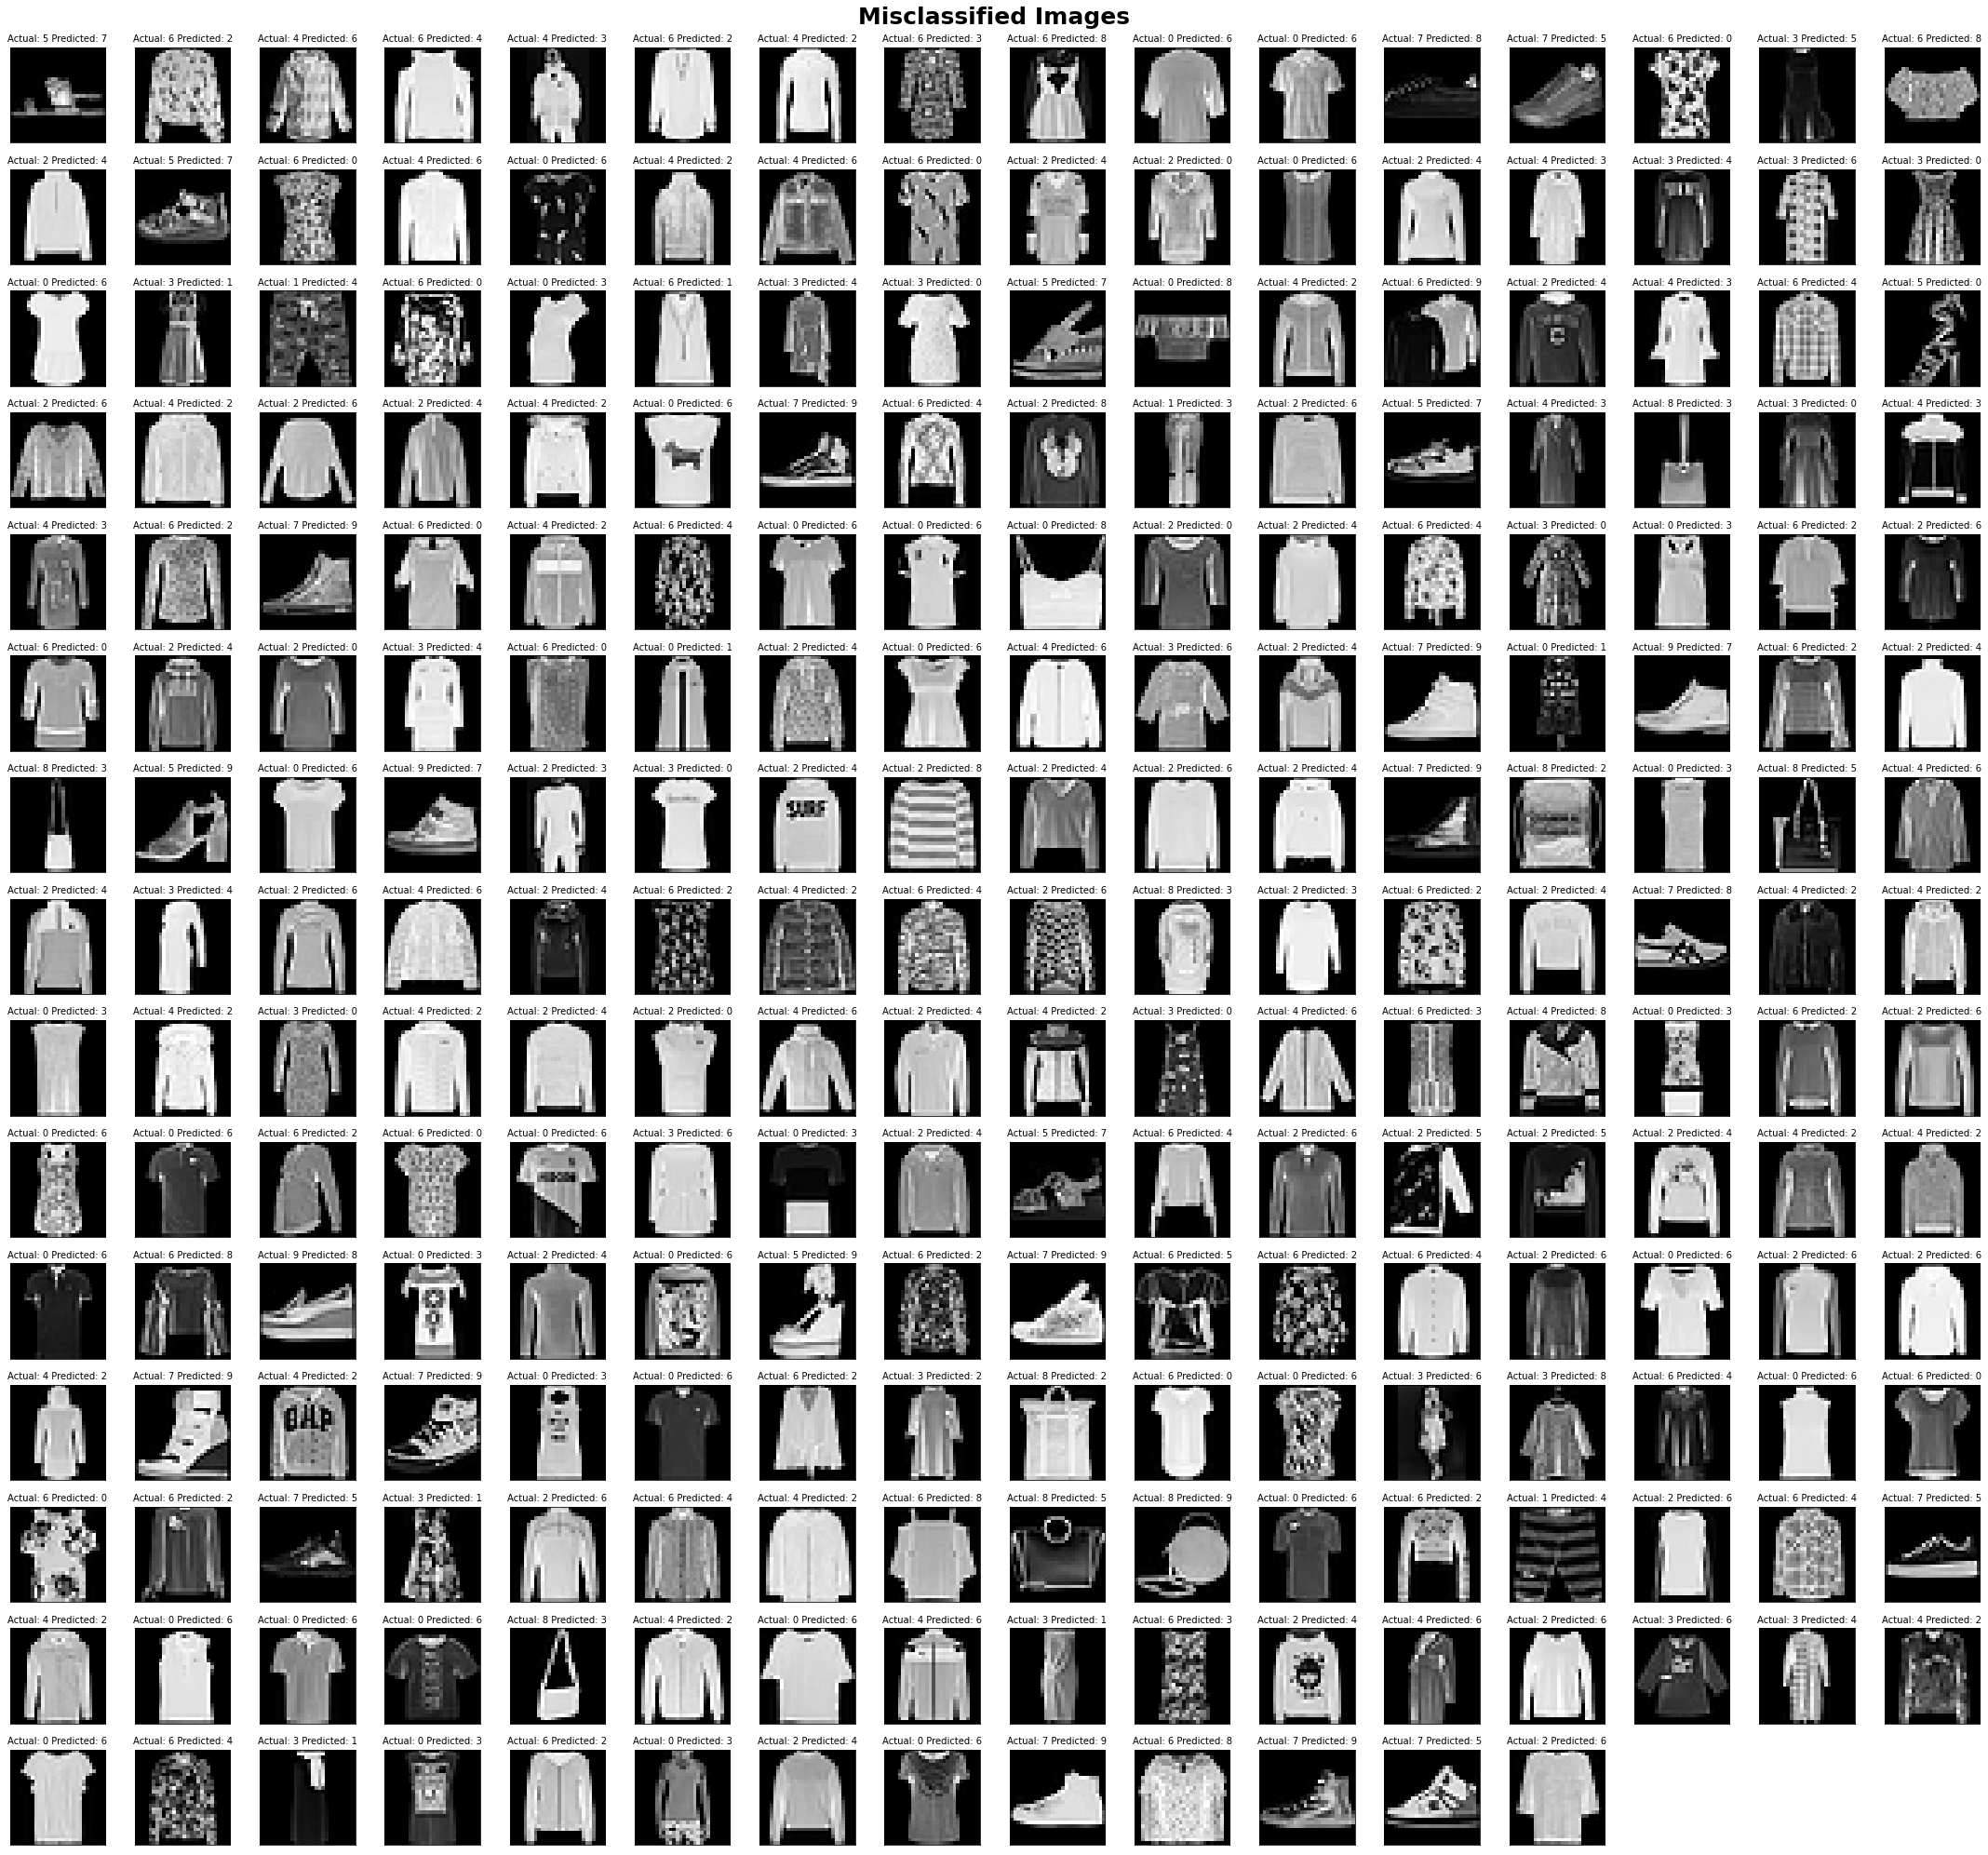

In [20]:
reshape_image = np.reshape(x_test, (len(x_test), round(math.sqrt(28*28)), round(math.sqrt(28*28))))

# Count how many misclassified images there are
count = 0
for i in range(len(prediction)):
    if np.argmax(prediction[i]) != np.argmax(y_test[i]):
        count += 1
print("Number of Misclassified Images: " + str(count))

fig = plt.figure(figsize=(30, 30))
fig.suptitle("Misclassified Images\n", fontweight="bold", fontsize=25)
fig.patch.set_facecolor('white')

image_index = 0
figure_size = 1
frequency = {}

while image_index < len(reshape_image) and figure_size < math.ceil(math.sqrt(count)) * math.ceil(math.sqrt(count)):
    if np.argmax(prediction[image_index]) != np.argmax(y_test[image_index]):
        fig.add_subplot(math.ceil(math.sqrt(count)), math.ceil(math.sqrt(count)), figure_size)
        figure_size += 1

        plt.gca().xaxis.set_visible(False)
        plt.gca().yaxis.set_visible(False)

        if str(np.argmax(y_test[image_index])) + ', '  + str(np.argmax(prediction[image_index])) in frequency.keys():
            frequency[str(np.argmax(y_test[image_index])) + ', '  + str(np.argmax(prediction[image_index]))] += 1
        else:
            frequency[str(np.argmax(y_test[image_index])) + ', '  + str(np.argmax(prediction[image_index]))] = 1
        
        title = "Actual: " + str(np.argmax(y_test[image_index])) + " Predicted: " + str(np.argmax(prediction[image_index]))
        plt.title(title, fontsize=10)
        plt.imshow(reshape_image[image_index], cmap='gray')
    image_index += 1

plt.tight_layout()
sorted_values = sorted(frequency.values(), reverse=True)
sorted_dict = {}

for i in sorted_values:
    for k in frequency.keys():
        if frequency[k] == i:
            sorted_dict[k] = frequency[k]
            break

print("\nActual, Predicted: Frequency \n" + str(sorted_dict))

plt.savefig("misclassified_images.png")